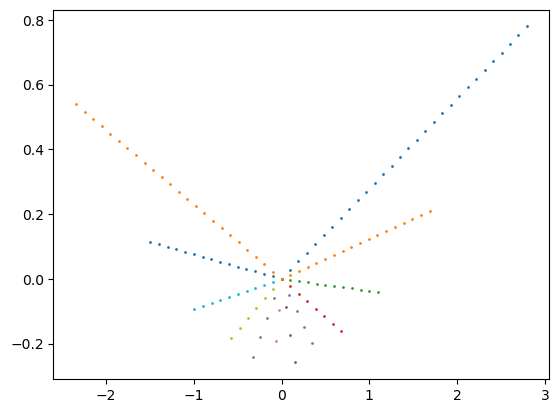

C:\Users\Pedro Damas\AppData\Local\Temp\ipykernel_11696\167140061.py:63: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [23]:
# Data handling and processing
import pandas as pd
import numpy as np

# Solar position calculations
from pvlib import solarposition

# Display
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Define the start and end dates, considering a whole day
start = f'2024-06-21 00:00:00'
end = f'2024-06-21 23:59:59'

# Generate a sequence of datetimes in 1 minute intervals
times = pd.date_range(start, end, freq='60min')

# Calculate solar position for the daterange generated (coordinate for Peniche) 
df = solarposition.get_solarposition(times, latitude=39.34883424, longitude=-9.34298515)

# Convert from the North-bearing CW azimuth reference frame to the East-bearing CCW polar reference frame
df['theta'] = 90 - df['azimuth']

# Calculate the shadow length
df['shadow_length'] = 1 / np.tan(df['apparent_elevation'] * np.pi/180)

# Remove nighttime
df = df[df['apparent_elevation'] > 0]

# Remove very long shadows
df = df[df['shadow_length'].abs() < 5]

# Loop over the dataframe
X, Y = [], []
for i, row in df.iterrows():

	# Create array of equally spaced points along the shadow
	r_arr = np.arange(0, row['shadow_length'], 0.1)
	
	#  Calculate the cartesian coordinates of the shadow
	x = r_arr * np.cos(row['theta'] * np.pi/180 )
	y = r_arr * np.sin(row['theta'] * np.pi/180 )
	
	plt.scatter(x, y, s=1)
	X += list(x)
	Y += list(y)
plt.show()
data = {
    'x': x,
    'y': y,
}

df = pd.DataFrame(data)

xbins = np.arange(df.x.min()-1, df.x.max()+1, 0.5)
df['xbins'] = pd.cut(df['x'], xbins)
ybins = np.arange(df.y.min()-1, df.y.max()+1, 0.5)
df['ybins'] = pd.cut(df['y'], ybins)
df['dummy'] = 1

pvt = pd.pivot_table(df, index='ybins', columns='xbins', values='dummy', aggfunc='count')
pvt.to_excel('teste.xlsx')
#plt.imshow(pvt)